<h2>Library</h2>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

<h2>Function</h2>

In [2]:
def plot_significant_dif(df, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)

    metrics = ['Reach', 'Impressions', 'Frequency', 'Clicks', 'Click Rate']  # Add 'Click Rate' to the list of metrics

    for i, metric in enumerate(metrics):
        ax = axes[i]
        if metric == 'Click Rate':
            data_aiq = df['Clicks'][df['Provider'] == 'AIQ'] / df['Impressions'][df['Provider'] == 'AIQ']  # Calculate Click Rate for AIQ
            data_lr = df['Clicks'][df['Provider'] == 'LR'] / df['Impressions'][df['Provider'] == 'LR']  # Calculate Click Rate for LR
        else:
            data_aiq = df[metric][df['Provider'] == 'AIQ']
            data_lr = df[metric][df['Provider'] == 'LR']

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(data_aiq, data_lr)

        ax.boxplot([data_aiq, data_lr], labels=['AIQ', 'LR'])
        ax.set_title(metric, fontsize=10)
        ax.set_ylabel('Value', fontsize=8)
        ax.tick_params(axis='both', labelsize=8)

        # Add a text annotation for significance
        alpha = 0.05
        if p_value < alpha:
            text = f"Significant (p-value: {p_value:.4f})"
            ax.text(0.5, -0.2, text, transform=ax.transAxes, fontsize=8, ha='center', color='red')
        else:
            text = f"Not Significant (p-value: {p_value:.4f})"
            ax.text(0.5, -0.2, text, transform=ax.transAxes, fontsize=8, ha='center', color='green')

    plt.tight_layout()
    plt.show()


<h2>Main</h2>

In [3]:
df = pd.read_csv(r'csv\df.csv', parse_dates=['Date'])

# Filter data for AU, BR, CA & FR
df_au = df[df['Country'].str.contains('AU')]
df_br = df[df['Country'].str.contains('BR')]
df_ca = df[df['Country'].str.contains('CA')]
#df_fr = df[df['Country'].str.contains('FR')]

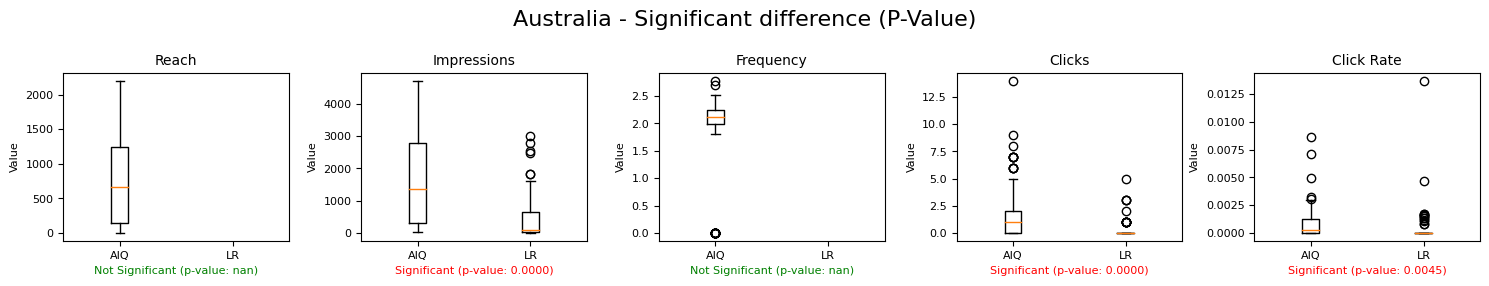

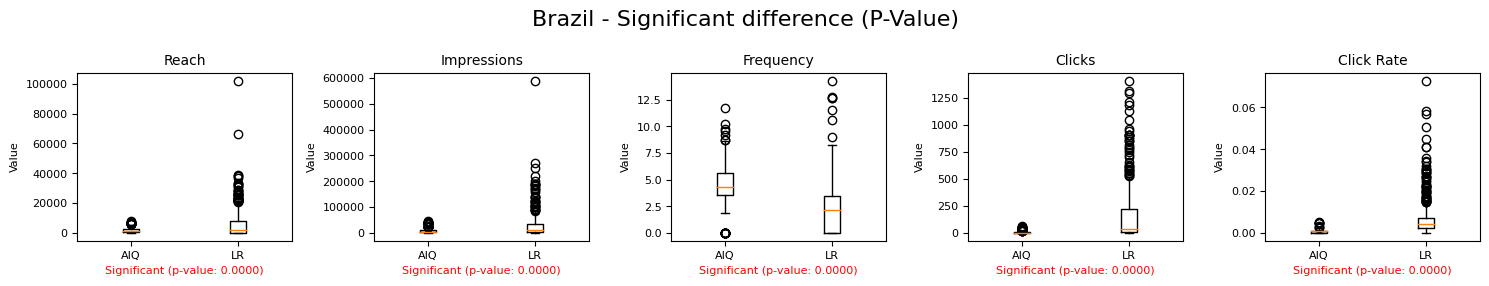

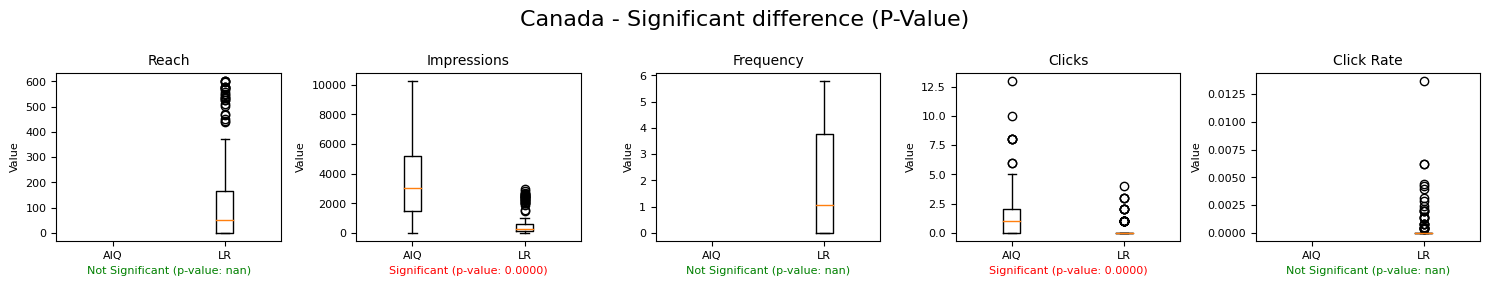

In [4]:
plot_significant_dif(df_au, 'Australia - Significant difference (P-Value)')
plot_significant_dif(df_br, 'Brazil - Significant difference (P-Value)')
plot_significant_dif(df_ca, 'Canada - Significant difference (P-Value)')